# Yelp Analysis

## Preamble

Yelp.com is a popular website for reviewing restaurants and other local businesses, the American equivalent of Dianping 大众点评网.

Uploaded to Canvas in the Homework 2 folder are two new files, one of which contains business descriptions for each restaurant in Pittsburgh, PA and the surrounding suburbs (​`Pittsburgh_businesses.csv`​), and one of which contains entries for each review of those restaurants, over 210,000 in total (​`Pittsburgh_reviews_no_text.csv`). This dataset is based off of the much larger dataset released by Yelp [here](https://www.yelp.com/dataset), which contains data for ten different cities. That website contains additional documentation and history of how the data was distributed. Individual usernames have been scrambed to a uniquely identifiable ID; the review texts are also available in the full dataset, and might make a good final project, but are omitted from this homework assignment data.

Retrieve both files from Canvas, upload them here, and import them into Pandas as dataframes for completing the tasks below.

In [ ]:
 # upload two csv files
from google.colab import files
files.upload()

In [ ]:
# import two files into Pandas as dataframes
## the first one 
import numpy as np
import pandas as pd

P_busi = pd.read_csv('Pittsburgh_businesses.csv')
P_busi

,business_id,name,address,city,state,postal_code,stars,review_count,categories,garage_parking,street_parking,validated_parking,valet_parking,wifi,alcohol,attributes.RestaurantsTakeOut,attributes.RestaurantsDelivery,attributes.RestaurantsReservations,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsGoodForGroups,attributes.GoodForKids,attributes.HasTV,attributes.OutdoorSeating,attributes.Caters,attributes.WheelchairAccessible
0,1RHY4K3BD22FK7Cfftn8Mg,Marathon Diner,"Center Core - Food Court, Fl 3, Pittsburgh Int...",Pittsburgh,PA,15231.0,4.0,35,"Sandwiches, Salad, Restaurants, Burgers, Comfo...",False,False,False,False,NaN,NaN,True,False,False,True,True,True,False,False,NaN,NaN
1,dQj5DLZjeDK3KFysh1SYOQ,Apteka,4606 Penn Ave,Pittsburgh,PA,15224.0,4.5,242,"Nightlife, Bars, Polish, Modern European, Rest...",False,True,False,False,free,full bar,True,False,False,True,True,False,False,False,True,True
2,v-scZMU6jhnmV955RSzGJw,No. 1 Sushi Sushi,436 Market St,Pittsburgh,PA,15222.0,4.5,106,"Japanese, Sushi Bars, Restaurants",False,True,False,False,no,no,True,False,False,True,False,True,True,False,True,True
3,KFbUQ-RR2UOV62Ep7WnXHw,Westwood Bar & Grill,825 Commonwealth Ave,West Mifflin,PA,15122.0,3.0,5,"American (Traditional), Restaurants",False,False,False,False,no,full bar,True,False,True,True,True,False,True,False,True,NaN
4,QHr_fc_TLnGfUEuDEa2jDg,PA Wine & Spirits Store,"125 Towne Centre Dr, Ste 500",Wexford,PA,15090.0,3.0,7,"Beer, Wine & Spirits, Food",False,False,False,False,NaN,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,0GYM_KIMzwH_CeL6S279Pw,Lapko's Bar & Grill,340 E 8th Ave,Homestead,PA,15120.0,4.0,4,"Nightlife, Dive Bars, Restaurants, American (T...",False,False,False,False,NaN,NaN,None,False,False,True,False,False,NaN,False,NaN,NaN
4233,hpX2k1MvzRAF8naLfaUYWA,Patsy's Market,483 Center Ave,Verona,PA,15147.0,4.5,7,"Restaurants, Food, Specialty Food, Meat Shops,...",False,False,False,False,NaN,NaN,True,False,False,True,NaN,True,NaN,NaN,NaN,NaN
4234,z0nVjbfDw8eb7N57HWNg8w,Tracy's Deli,1926 Spring Garden Ave,Spring Hill City View,PA,15212.0,4.0,5,"Food, Restaurants, Delis",False,False,False,False,no,no,True,True,False,True,NaN,True,True,True,True,NaN
4235,cjZfgcQwA6KmQ_ANWKN2aw,Bruegger's Bagels,3527 Washington Rd,McMurray,PA,15317.0,3.5,6,"Sandwiches, Breakfast & Brunch, Food, Bagels, ...",False,False,False,False,NaN,no,True,False,False,True,True,True,False,False,True,NaN


In [ ]:
## the second one 
P_reviews = pd.read_csv('Pittsburgh_reviews_no_text.csv')
P_reviews

,business_id,user_id,stars
0,eU_713ec6fTGNO4BegRaww,w31MKYsNFMrjhWxxAb5wIw,4.0
1,FxLfqxdYPA6Z85PFKaqLrg,GYNnVehQeXjty0xH7-6Fhw,4.0
2,9nTF596jDvBBia2EXXiOOg,q3GeSW9dWN9r_ocqFkhrvg,1.0
3,sMzNLdhJZGzYirIWt-fMAg,_o740mSNRhMNYuPjSJoPLg,5.0
4,hcFSc0OHgZJybnjQBrL_8Q,JjDR060LJQcNNVWKuU64fA,4.0
...,...,...,...
216851,KpfCj839-MPcxM8FKkW7GA,iEZHFtv4DTAZxUxluMj8yQ,3.0
216852,SmkYLXEYhzwUZdS6TAevHg,A42Rgn-qiugIJQrdBqiRJQ,5.0
216853,ZJdOOIubTizd1eqECkeK-Q,jNlqkRiOV748xAb-h4cG2g,4.0
216854,EHKzu5r2NEz5Zq2R84J4ow,omurcMm91c2y-c79OmSMiw,4.0


# Part 1

By manual inspection, reading the dataset documentation, and using summary methods like `.describe()`, give a brief overview of the columns that are present in these two data files. Which columns do you feel confident you understand fully? Which columns do you think you should learn more about before making strong statements about your data and results?

In [ ]:
P_busi.describe(include = 'all')

,business_id,name,address,city,state,postal_code,stars,review_count,categories,garage_parking,street_parking,validated_parking,valet_parking,wifi,alcohol,attributes.RestaurantsTakeOut,attributes.RestaurantsDelivery,attributes.RestaurantsReservations,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsGoodForGroups,attributes.GoodForKids,attributes.HasTV,attributes.OutdoorSeating,attributes.Caters,attributes.WheelchairAccessible
count,4237,4237,4203,4237,4237,4228.000000,4237.000000,4237.000000,4237,4237,4237,4237,4237,2851,2973,4237,3416,3251,4170,3235,3234,2935,3255,2734,579
unique,4237,3151,3568,158,1,NaN,NaN,NaN,2788,2,2,2,2,3,3,3,3,3,2,3,3,2,3,3,3
top,CipRVpM7YzsE-9U9wf2YNQ,Starbucks,1000 Airport Blvd,Pittsburgh,PA,NaN,NaN,NaN,"Restaurants, Pizza",False,False,False,False,no,no,True,False,False,True,True,True,True,False,True,True
freq,1,54,17,2627,4237,NaN,NaN,NaN,121,4063,2894,4220,4167,1482,1651,3902,2476,2231,3935,2723,2583,1627,2093,1367,502
mean,NaN,NaN,NaN,NaN,NaN,15199.668165,3.559122,49.613170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,102.250907,0.787044,90.319362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,15003.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,15146.000000,3.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,15213.000000,3.500000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,15226.000000,4.000000,54.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In the dataset, it is easy to understand columns that represent basic information aboout *restaurants, such as business_id, name, address, city, state, postal code*. 

The rest columns are about the dishes and service provided by each restaurant. From column *wifi* to column *attributes.WheelchairAccessible*, it is easy to understand what columns present. However, there are much missing data in these columns, which will make the further research more difficult. 

*Stars* and *review_count* represent comments from users. But I don't know what *stars* represent, the average or the highest star of each restaurant. Also, I feel difficult to understand the column *categories*. It seems there are too many different tags in the column, without a uniform standard. And I don't know the differences among them. Besides, I feel not confident with the column *garage-parking*, *street-parking*, and *validate-parking*. I don’t know what standard this website uses to count the number of parking spaces. And I am not sure about the definition of *validate-parking* in the dataset.

In [ ]:
P_reviews.describe(include = 'all')

,business_id,user_id,stars
count,216856,216856,216856.000000
unique,4237,64181,NaN
top,JLbgvGM4FXh9zNP4O5ZWjQ,rCWrxuRC8_pfagpchtHp6A,NaN
freq,1816,805,NaN
mean,NaN,NaN,3.741160
std,NaN,NaN,1.328642
min,NaN,NaN,1.000000
25%,NaN,NaN,3.000000
50%,NaN,NaN,4.000000
75%,NaN,NaN,5.000000


In this dataset, there are three columns -- *business_id*, *user_id* and *stars*. *Business_id* and *user_id* are easy to understand which respectively represent  ids of restaurants and ids of customers who gave stars on the restaurants. And the column *stars* represents the score which a customer gives to a restaurant. But I should learn more about this column to know some further information, such as the mean stars a customer gave or a restaurant received, the maximum/minimum star a customer gave or a restaurant received. 

# Part 2


## Q1

**Quantitative**
   * What are the distributions of star counts (1-5) in the user reviews dataframe and the business dataframe? Give a percentage breakdown for each possible rating as well as the mean.

**Qualitative**
   * Describe at least three ways in which the two distributions differ. What do these differences tell you about the domain?

##### ***Quantitative***

In [ ]:
# the distribution percentages of star counts in user reviews
a = P_reviews['stars'].value_counts(dropna = False, normalize = True).apply(lambda x: (format(x, '.2%')))
a_1 = pd.DataFrame({'Stars': a.index, 'Freq_in_reviews': a.values}).sort_values(by = ['Stars'], ascending = False)
a_1

,Stars,Freq_in_reviews
0,5.0,38.06%
1,4.0,28.18%
2,3.0,13.98%
4,2.0,9.35%
3,1.0,10.42%


In [ ]:
# calculate the mean star counts in user reviews
mean_busi = round(np.mean(P_reviews['stars']),2)
print('The mean star counts in user reviews is ' + str(mean_busi))

The mean star counts in user reviews is 3.74


In [ ]:
# the distribution percentages of star counts in business
b = P_busi['stars'].value_counts(dropna = False, normalize = True).apply(lambda x: (format(x, '.2%')))
b_1 = pd.DataFrame({'Stars': b.index, 'Freq_in_business': b.values}).sort_values(by = ['Stars'], ascending = False)
b_1

,Stars,Freq_in_business
6,5.0,3.49%
3,4.5,16.45%
0,4.0,24.22%
1,3.5,24.03%
2,3.0,16.85%
4,2.5,8.47%
5,2.0,4.48%
7,1.5,1.51%
8,1.0,0.50%


In [ ]:
# calculate the mean star counts in business
mean_busi = round(np.mean(P_busi['stars']),2)
print('The mean star counts in business is ' + str(mean_busi))

The mean star counts in business is 3.56


##### ***Qualitative***

<BarContainer object of 5 artists>

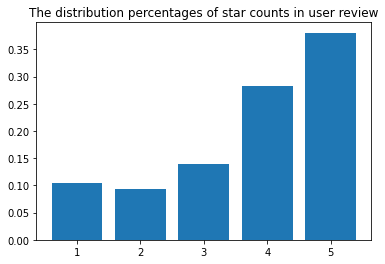

In [ ]:
# draw the bar plot of star counts in user reviews
import matplotlib.pyplot as plt
p1 = P_reviews['stars'].value_counts(dropna = False, normalize = True) # Because I met some problem in drawing bar directly from a or a_1, I have to create a new Series. I think maybe the process of transfering floats to percentage format caused the failure
plt.title('The distribution percentages of star counts in user review')
plt.bar(p1.index,p1.values)

<BarContainer object of 9 artists>

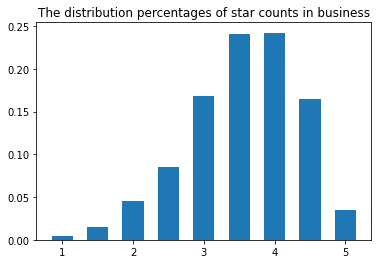

In [ ]:
# draw the bar plot of star counts in business
p2 =P_busi['stars'].value_counts(dropna = False, normalize = True)
plt.title('The distribution percentages of star counts in business')
plt.bar(p2.index,p2.values, width=0.3)

Three differences are:


*   The classification of star counts in business is more detailed, with 0.5 as a level, and in user reviews with 1 as a level.
*   The trend in Figure 1 (star counts in user reviews) is that the higher the star counts, the higher the proportion of restaurants; while Figure 2 (star counts in business) is closer to the normal distribution, with the highest proportion of restaurants with a star counts of 3 to 4 stars. 5-star is about 3.49% in business, while in user reviews is larger than 38%.
*   Mean of star counts in user reviews is about 0.2 higher than that in business.


It means that business dataframe (in Figure 2) has a more detailed scoring standard, which widens the difference between restaurants. In user reviews dataframe, the level is 1 star. Also, in user reviews, customers give more higher scores, while in business, scores are more objective because its shape is closer to the normal distribution.


## Q2

Ten columns in the dataset are named with the prefix `attributes.` 

**Quantitative**
   * For each of these columns, what percentage of the data is missing? 
   * Decide on a method for handling the missing data for each of the attribute columns, and apply it to the dataframe. Did you choose different approaches for different columns, or do you recommend one solution for the whole dataset?

**Qualitative**
   * In your judgment, which of these columns has sufficient information to be used, and which are simply missing too much data? Why?


##### ***Quantitative***

In [ ]:
# calculate the percentage of missing data in ten columns
null_per = (P_busi.isnull().sum(axis=0)/P_busi.shape[0]).sort_values().map(lambda x:"{:.2%}".format(x))
null_per = pd.DataFrame({'Column_name': null_per.index, 'Per_null': null_per.values})
null_per_attr = null_per[null_per['Column_name'].str.contains('attributes')].sort_values(by = ['Per_null'], ascending = False)
null_per_attr

,Column_name,Per_null
24,attributes.WheelchairAccessible,86.33%
23,attributes.Caters,35.47%
21,attributes.HasTV,30.73%
19,attributes.GoodForKids,23.67%
18,attributes.RestaurantsGoodForGroups,23.65%
17,attributes.RestaurantsReservations,23.27%
16,attributes.OutdoorSeating,23.18%
15,attributes.RestaurantsDelivery,19.38%
14,attributes.BusinessAcceptsCreditCards,1.58%
1,attributes.RestaurantsTakeOut,0.00%


In [ ]:
# I choose to use one method to handle the missing data
# As users didn't provide the related information on these facilities, I choose to fill all the blanks with 'False'
P_busi[[col for col in P_busi.columns if col.startswith('attributes.')]].fillna('False')

,attributes.RestaurantsTakeOut,attributes.RestaurantsDelivery,attributes.RestaurantsReservations,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsGoodForGroups,attributes.GoodForKids,attributes.HasTV,attributes.OutdoorSeating,attributes.Caters,attributes.WheelchairAccessible
0,True,False,False,True,True,True,False,False,False,False
1,True,False,False,True,True,False,False,False,True,True
2,True,False,False,True,False,True,True,False,True,True
3,True,False,True,True,True,False,True,False,True,False
4,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4232,None,False,False,True,False,False,False,False,False,False
4233,True,False,False,True,False,True,False,False,False,False
4234,True,True,False,True,False,True,True,True,True,False
4235,True,False,False,True,True,True,False,False,True,False


#### ***Qualitative***

In my judgement, the percentage of missing data is under 25 means sufficient information to be used as more than 3/4 of the data is recorded. Based on the standard, *GoodForKids, RestaurantsGoodForGroups, RestaurantsReservations, OutdoorSeating, RestaurantsDelivery, BusinessAcceptsCreditCards, RestaurantsTakeOut* have sufficient information. *WheelchairAccessible, Caters, HasTV* don't have sufficient information. 

## Q3



Using `.groupby()`, create a `users` dataframe, with one row per user, including three columns: `user_id`, `review_count`, and `stars_mean`. Use this dataframe to answer the quantitative questions below.

**Quantitative**
   * How many users have written at least 100 reviews?
   * How many users give an average review of 4 stars or higher?
   * Among users who have written at least 100 reviews, what percentage give an average review of 4 stars or higher?

**Qualitative**
   * Select one high-volume reviewer as a case study. What kind of restaurants do they like, and how can you tell?

#####***Quantitative***

In [ ]:
# create the users dataframe
review_count = P_reviews.groupby(['user_id'], axis = 0)['business_id'].size()
stars_mean = P_reviews.groupby(['user_id'], axis = 0)['stars'].mean()
users = pd.DataFrame({'user_id':review_count.index, 'review_count': review_count.values, 'stars_mean': stars_mean.values}).sort_values(by = ['review_count'], ascending = False)
users

,user_id,review_count,stars_mean
55252,rCWrxuRC8_pfagpchtHp6A,805,4.059627
22548,Lfv4hefW1VbvaC2gatTFWA,698,3.598854
5805,4wp4XI9AxKNqJima-xahlg,540,3.879630
7216,6Ki3bAL0wx9ymbdJqbSWMA,463,3.704104
41048,d0D7L-vfQDIADolnPAcb9A,422,3.644550
...,...,...,...
33519,W_kJVAPIS1-YK9JfJXH-7A,1,5.000000
33520,Wa0vRI-hSmyHnMr29tAuyw,1,5.000000
9538,8fNthIVJKc9GkdnApwrsug,1,1.000000
33522,Wa9oREq7hCyzqlUU8fCWkw,1,1.000000


In [ ]:
# How many users have written at least 100 reviews?
users_cnt = np.sum(users["review_count"] >= 100)
print('There are', str(users_cnt), 'have written at least 100 reviews.')

There are 126 have written at least 100 reviews.


In [ ]:
# How many users give an average review of 4 stars or higher?
users_cnt1 = np.sum(users['stars_mean'] >= 4)
print('There are', str(users_cnt1), 'users giving an average review of 4 stars or higher. ')

There are 37064 users giving an average review of 4 stars or higher. 


In [ ]:
# Among users who have written at least 100 reviews, what percentage give an average review of 4 stars or higher?
users_cnt2 = np.sum((users['stars_mean'] >= 4) & (users['review_count'] >= 100)) / users_cnt
print(str(users_cnt2 *100)[:5], 'percentage of users who have written at least 100 reviews give an average review of 4 stars or higher.' )            

16.66 percentage of users who have written at least 100 reviews give an average review of 4 stars or higher.


##### ***Qualitative***

In [ ]:
# select user_id = rCWrxuRC8_pfagpchtHp6A as a case study
# he gives 805 reviews
# merge two dataframe
user_case = P_reviews.loc[P_reviews['user_id'] == 'rCWrxuRC8_pfagpchtHp6A']  # extract all data of user rCWrxuRC8_pfagpchtHp6A from user reviews
user_case1 = pd.merge(user_case, P_busi, on = ['business_id'], how = 'inner')  # join two dataframes 
user_case2 = pd.DataFrame({'business_id':user_case1['business_id'],'star':user_case1['stars_x'], 'name':user_case1['name'], 'categories':user_case1['categories']})  # keep columns we will use in the case
user_case2

,business_id,star,name,categories
0,PbOQlLSloU5Zkpth5I3cjA,4.0,Vocelli Pizza,"Restaurants, Pizza"
1,grZ6FnfZoj1pQWElAQve3g,4.0,Wendy's,"Restaurants, Fast Food, Burgers"
2,grZ6FnfZoj1pQWElAQve3g,4.0,Wendy's,"Restaurants, Fast Food, Burgers"
3,grZ6FnfZoj1pQWElAQve3g,2.0,Wendy's,"Restaurants, Fast Food, Burgers"
4,grZ6FnfZoj1pQWElAQve3g,4.0,Wendy's,"Restaurants, Fast Food, Burgers"
...,...,...,...,...
800,w4u0y6NEPtV98SGG4wOKnQ,3.0,DiBella's Subs,"Restaurants, Food, Salad, Delis, Sandwiches"
801,i-fdgshW3xovHeMZosDerw,4.0,My Thai,"Salad, Restaurants, Asian Fusion, Noodles, Thai"
802,53-Y3Jw20QV6TeDkRjSyJQ,4.0,Fox's Pizza Den,"Pizza, Food, Restaurants, Sandwiches, Juice Ba..."
803,0AoLth4u_V4mOx8Az_AIYQ,4.0,Brighton Hot Dog Shoppe,"Hot Dogs, Fast Food, Restaurants, Burgers"


In [ ]:
# sort the dataframe by the number of reviews of each categories and the mean of their star counts
sorted_user_case = user_case2.groupby('categories').agg({'business_id':np.size, 'star':np.mean}).sort_values(by = 'business_id', axis = 0, ascending = False)
sorted_user_case[:20]  # keep the top 20 records

,business_id,star
categories,,
"Restaurants, Pizza",25,3.520000
"Pizza, Restaurants",22,3.818182
"Food, Grocery",14,3.857143
"Restaurants, Chinese",13,3.769231
"Delis, Restaurants",11,4.727273
"Chinese, Restaurants",9,3.666667
"Food, Restaurants, Bakeries",9,4.777778
"Restaurants, American (Traditional)",8,3.875000
"Restaurants, Mexican",7,4.000000


From the above dataframe, we can see that this user went pizza resturants, grocery restaurants and Chinese restaurants the most, with 47(25+22), 14, 13 records. It means that he went to these kinds of restaurants and posted reviews the most frequently. From the perspective of the average star counts of these three categories, all of the mean stars are near to 4 stars, which means that he gave positive comments to these restaurants.

Also, from the mean star counts among all records above, we can see that he gave higher stars to bakeries, cakes and some dessert shops (such as Food, Restaurants, Bakeries, Restaurants, Cupcakes, Bakeries, Food, Donuts) with the stars near to full marks. But the number of these records is small around 10. It still needs more data to prove that he preferred dessert shops and gave higher marks.

## Q4

In the `categories` column, each restaurant is described with a number of labels, like `Sports Bars`, `Coffee & Tea`, or `Mexican`. 

**Quantitative**
   * Use `.apply()` to split these descriptive strings apart. 
   * How many unique labels are there in our dataset? How many restaurants exist for each category label? 
   * For the five most common categories in the dataset, what is the mean score for restaurants within that category?

**Qualitative**

   * Describe the choices you had to make when writing this code - what unusual cases did you have to manage?

##### ***Quantitative***

In [ ]:
# extract the business_id and categories columns
import numpy as np
import pandas as pd
bus_cate = pd.DataFrame({'Business_id': P_busi['business_id'], 'Categories': P_busi['categories']})
bus_cate

,Business_id,Categories
0,1RHY4K3BD22FK7Cfftn8Mg,"Sandwiches, Salad, Restaurants, Burgers, Comfo..."
1,dQj5DLZjeDK3KFysh1SYOQ,"Nightlife, Bars, Polish, Modern European, Rest..."
2,v-scZMU6jhnmV955RSzGJw,"Japanese, Sushi Bars, Restaurants"
3,KFbUQ-RR2UOV62Ep7WnXHw,"American (Traditional), Restaurants"
4,QHr_fc_TLnGfUEuDEa2jDg,"Beer, Wine & Spirits, Food"
...,...,...
4232,0GYM_KIMzwH_CeL6S279Pw,"Nightlife, Dive Bars, Restaurants, American (T..."
4233,hpX2k1MvzRAF8naLfaUYWA,"Restaurants, Food, Specialty Food, Meat Shops,..."
4234,z0nVjbfDw8eb7N57HWNg8w,"Food, Restaurants, Delis"
4235,cjZfgcQwA6KmQ_ANWKN2aw,"Sandwiches, Breakfast & Brunch, Food, Bagels, ..."


In [ ]:
# split the describle into labels
# define a function to split 
def label(a):
  b = a.str.split(', ', expand = True).stack() # need to use ', ' as the break condition, otherwise there will be 'pizza' and ' pizza' at the same time, though they are the same
  return (b)

# create a dataframe including all labels and corresponding business_id
bus_cate1 = bus_cate.apply(label)
bus_cate1 = bus_cate1.fillna(method = 'pad', axis = 0)
bus_cate1

Business_id              Categories
0    0  1RHY4K3BD22FK7Cfftn8Mg              Sandwiches
     1  1RHY4K3BD22FK7Cfftn8Mg                   Salad
     2  1RHY4K3BD22FK7Cfftn8Mg             Restaurants
     3  1RHY4K3BD22FK7Cfftn8Mg                 Burgers
     4  1RHY4K3BD22FK7Cfftn8Mg            Comfort Food
...                        ...                     ...
4236 0  2XZ4g_ps_H55CmxFs4Pu8A                    Bars
     1  2XZ4g_ps_H55CmxFs4Pu8A  American (Traditional)
     2  2XZ4g_ps_H55CmxFs4Pu8A             Restaurants
     3  2XZ4g_ps_H55CmxFs4Pu8A               Nightlife
     4  2XZ4g_ps_H55CmxFs4Pu8A                 Tex-Mex

[17606 rows x 2 columns]

In [ ]:
# How many unique labels are there in our dataset? How many restaurants exist for each category label?
label_cnt = bus_cate1['Categories'].nunique()
print('There are',label_cnt, 'unique labels in the dataset')

There are 341 unique labels in the dataset


In [ ]:
# How many restaurants exist for each category label?
business_cnt = pd.DataFrame(bus_cate1.groupby('Categories').agg(np.size))
business_cnt
# rank the lables by the number of business
business_cnt.sort_values(by = 'Business_id', axis = 0, ascending= False)

,Business_id
Categories,
Restaurants,3512
Food,1595
Pizza,690
Nightlife,686
Bars,670
...,...
Men's Clothing,1
Museums,1
Nail Salons,1


From the above results, we know that the five most common categories are Restaurants, Food, Pizza, Nightlife, Bars

In [ ]:
# For the five most common categories in the dataset, what is the mean score for restaurants within that category?
mean_Restaurants = P_busi[P_busi['categories'].str.contains("Restaurants")].mean().stars
mean_Food = P_busi[P_busi['categories'].str.contains("Food")].mean().stars
mean_Pizza = P_busi[P_busi['categories'].str.contains("Pizza")].mean().stars
mean_Nightlife = P_busi[P_busi['categories'].str.contains("Nightlife")].mean().stars
mean_Bars = P_busi[P_busi['categories'].str.contains("Bars")].mean().stars

# print the mean
print("The mean score for restaurants within 'Restaurants' is","{:.2f}".format(mean_Restaurants))
print("The mean score for restaurants within 'Food' is","{:.2f}".format(mean_Food))
print("The mean score for restaurants within 'Pizza' is","{:.2f}".format(mean_Pizza))
print("The mean score for restaurants within 'Nightlife' is","{:.2f}".format(mean_Nightlife))
print("The mean score for restaurants within 'Bars' is","{:.2f}".format(mean_Bars))

The mean score for restaurants within 'Restaurants' is 3.50
The mean score for restaurants within 'Food' is 3.63
The mean score for restaurants within 'Pizza' is 3.43
The mean score for restaurants within 'Nightlife' is 3.53
The mean score for restaurants within 'Bars' is 3.59


##### ***Qualitative***

The first point I need to manage is that when spliting the categories to single labels, we need to use ', '(a comma and a blank space) as the spliting conditions so that we can have the accuarate results and avoid the happening of 'pizza' and ' pizza' becoming two distict labels.

The second point is that when splitting all the categories, I need to fill up blanks in the column business_id so that we can know that the matching relationship between business_id and labels for the further work.

# Part 3
Imagine we are organizing a family dinner for up to 20 relatives that are visiting Pittsburgh. We do not yet know exactly who is visiting or what their specific needs and preferences will be. You have chosen to use this dataset to propose different locations for a dinner reservation.



## Q1

One task in data science is to take a set of quantifiable, searchable facts and turn them into your own qualitative rules or intuitions for making choices. This often requires comparing multiple different aspects of the data, not just maximizing one or two variables. Developing this decision-making process can be referred to as a *heuristic*.

Without using technical jargon or variable names from the dataset, describe **two different heuristics** for selecting a restaurant to host the dinner. Each should make different assumptions about what is most important when making a selection. For each of your options, describe a scenario where this heuristic is the best choice for making a restaurant selection.

*You will receive up to 5 points for this description. Answers should be in plain English and should **NOT** rely on column names or implementation details of the Yelp dataset.*

***The first heuristic is the level of dishes and service provided by the restaurant, as well as customer reviews.*** It represents customers who pay more attention to the dishes and service and they focus more on the food provided. It includes the freshness of the dishes, the number of new dishes, the speed of serving, the attitude of  waiters, the number of positive reviews, etc. For example, I prefer to choose restaurants with fresh dishes, high speed of serving, warm and sweet attitudes of waiters, and a high-volume of good comments.

***The second heuristic is the convenience of the restaurant and the abundance of supporting facilities.*** It represents customers who care more about the environment of restaurants and whether it is a good place to have a party or meet with different friends -- for some social needs. It includes the convenience of traffic - if there are public transportation methods to arrive, the number of parking spaces, disabled facilities, babychairs, babycare, wifi service, payment methods, etc. For example, I prefer to choose restaurants near subway stations, with enough parking spaces, warm lining service, free wifi, and various payment methods. 

## Q2

For each of the two heuristics you described, use the Yelp dataset to select a best restaurant option, and an alternate back-up option. 

*For up to 2 points per heuristic, explain how you will translate the heuristic into Pandas filtering and searching code using the dataset. You can give this explanation standalone, with a text cell, or as comments within a Python implementation.*

*Then, for up to 3 points per heuristic, use that heuristic to make a clear recommendation for the best restaurant and an alternate back-up, given the data available. If your answer is reliant on bad or missing data, describe the assumptions you made.*

#### For the first heuristic

The first heuristic is to assess the dishes and service in restaurants, more relying on stars and reviews.

***Hypothetical scenario:***

The family will choose pizza restaurants with high average stars from customers, a high-volume reviews in Pittsburgh. They plan to drive there. And They also hope it will provide free wifi and researvation service.

In [ ]:
# select pizza restaurants in Pittsburgh with at least one parking-related place and free wifi
h1 = P_busi.loc[(P_busi['city'] == 'Pittsburgh') &
                (P_busi['categories'].str.contains('Pizza')) & 
                ((P_busi['street_parking'] == True)|(P_busi['garage_parking'] == True)|(P_busi['validated_parking'] == True)) & (P_busi['wifi'] == 'free') &
                (P_busi['attributes.RestaurantsReservations'] == 'True')]
# get their average stars from review dataset
h1_1 = pd.merge(h1,P_reviews,how = 'inner', on = 'business_id')
h1_1

,business_id,name,address,city,state,postal_code,stars_x,review_count,categories,garage_parking,street_parking,validated_parking,valet_parking,wifi,alcohol,attributes.RestaurantsTakeOut,attributes.RestaurantsDelivery,attributes.RestaurantsReservations,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsGoodForGroups,attributes.GoodForKids,attributes.HasTV,attributes.OutdoorSeating,attributes.Caters,attributes.WheelchairAccessible,user_id,stars_y
0,b2ZukyGCS7xDlv0ZAlXdYg,Alida's Woodfire Cucina,"3345 Penn Ave, Ste 200",Pittsburgh,PA,15201.0,4.0,38,"Pizza, Restaurants, Italian, Nightlife, Bars, ...",False,True,False,False,free,full bar,True,False,True,True,True,True,True,False,False,True,pW_XkS9BfbnAQ_JMxNA-8w,5.0
1,b2ZukyGCS7xDlv0ZAlXdYg,Alida's Woodfire Cucina,"3345 Penn Ave, Ste 200",Pittsburgh,PA,15201.0,4.0,38,"Pizza, Restaurants, Italian, Nightlife, Bars, ...",False,True,False,False,free,full bar,True,False,True,True,True,True,True,False,False,True,gQU7RVY_A38xLm5Ot7-Itg,5.0
2,b2ZukyGCS7xDlv0ZAlXdYg,Alida's Woodfire Cucina,"3345 Penn Ave, Ste 200",Pittsburgh,PA,15201.0,4.0,38,"Pizza, Restaurants, Italian, Nightlife, Bars, ...",False,True,False,False,free,full bar,True,False,True,True,True,True,True,False,False,True,WMnV3Y28nnHJ13BJVEq0bg,2.0
3,b2ZukyGCS7xDlv0ZAlXdYg,Alida's Woodfire Cucina,"3345 Penn Ave, Ste 200",Pittsburgh,PA,15201.0,4.0,38,"Pizza, Restaurants, Italian, Nightlife, Bars, ...",False,True,False,False,free,full bar,True,False,True,True,True,True,True,False,False,True,v4VL2LXh7MkESDnF_nBM_Q,2.0
4,b2ZukyGCS7xDlv0ZAlXdYg,Alida's Woodfire Cucina,"3345 Penn Ave, Ste 200",Pittsburgh,PA,15201.0,4.0,38,"Pizza, Restaurants, Italian, Nightlife, Bars, ...",False,True,False,False,free,full bar,True,False,True,True,True,True,True,False,False,True,q68yQx7j_81FkcGrcNYtWw,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1061,JTKzGJvIK9yuoUf-erV2qQ,Bella Notte,1914 Penn Ave,Pittsburgh,PA,15222.0,3.5,150,"Restaurants, Italian, Pizza",False,True,False,False,free,full bar,True,True,True,True,True,True,True,True,True,NaN,o_70R0Kd5ZArpup6YsvFKA,5.0
1062,JTKzGJvIK9yuoUf-erV2qQ,Bella Notte,1914 Penn Ave,Pittsburgh,PA,15222.0,3.5,150,"Restaurants, Italian, Pizza",False,True,False,False,free,full bar,True,True,True,True,True,True,True,True,True,NaN,voTmwjTzaKSq3a9Eiwy3DQ,1.0
1063,JTKzGJvIK9yuoUf-erV2qQ,Bella Notte,1914 Penn Ave,Pittsburgh,PA,15222.0,3.5,150,"Restaurants, Italian, Pizza",False,True,False,False,free,full bar,True,True,True,True,True,True,True,True,True,NaN,7fVjUi2xxTgstVr8_IhsIQ,3.0
1064,JTKzGJvIK9yuoUf-erV2qQ,Bella Notte,1914 Penn Ave,Pittsburgh,PA,15222.0,3.5,150,"Restaurants, Italian, Pizza",False,True,False,False,free,full bar,True,True,True,True,True,True,True,True,True,NaN,wh7yz5cZKi-nMhyLhUIM0Q,4.0


In [ ]:
# keep the columns that will be used -- name, business_id, stars_y(from P_reviews),review_count, parking related columns(garage_parking, street_parking, validated_parking), wifi
h1_2 = pd.DataFrame({'name':h1_1['name'], 
                     'business_id': h1_1['business_id'], 
                     'stars': h1_1['stars_y'], 
                     'review_cnt': h1_1['review_count'], 
                     'garage_parking': h1_1['garage_parking'], 
                     'street_parking': h1_1['street_parking'], 
                     'validated_parking': h1_1['validated_parking'], 
                     'wifi' :h1_1['wifi'],
                     'reservation': h1_1['attributes.RestaurantsReservations']})
# group by business_id and calculate the mean of stars
h1_2 = h1_2.groupby('business_id').agg({'name': np.unique,
                                        'stars':np.mean, 
                                        'review_cnt':np.unique, 
                                        'garage_parking':np.unique, 
                                        'street_parking': np.unique, 
                                        'validated_parking': np.unique, 
                                        'wifi': np.unique,
                                        'reservation': np.unique})
h1_2

,name,stars,review_cnt,garage_parking,street_parking,validated_parking,wifi,reservation
business_id,,,,,,,,
1YC7AbQMlNb5mLUlwwaa3w,Bites and Brews,3.348837,85,False,True,False,free,True
5OV1bavavdsYyfeBRNiOeA,Osteria 2350,3.375000,71,False,True,True,free,True
7odNqxZDSR6ZVgxjp2r39A,Mezzo,3.675325,77,False,True,False,free,True
AKQbrvRBZvU5kB9Ut4gVkg,Pizzaiolo Primo,3.679825,220,False,True,False,free,True
GnPXUkEvX5M0YR_PVGhWgg,Park Pizza & Cream,3.945946,35,False,True,False,free,True
HhPVzZYQI-akaXRK_A4dKQ,Del's Bar and Ristorante DelPizzo,2.645833,93,False,True,False,free,True
JTKzGJvIK9yuoUf-erV2qQ,Bella Notte,3.735484,150,False,True,False,free,True
LTPcaw-_IqOfTSDxe8811A,Duke's Pub and Pizza,2.888889,17,False,True,False,free,True
MPbzeBX4f98CgK0ih1rLVw,Bulldog Pub,4.298246,53,False,True,False,free,True


In [ ]:
# pick the restaurants with high average stars, more than 50 reviews, at least one parking place
h1_2.loc[h1_2['review_cnt'] >= 50].sort_values(by = 'stars', axis = 0, ascending = False).head()

,name,stars,review_cnt,garage_parking,street_parking,validated_parking,wifi,reservation
business_id,,,,,,,,
MPbzeBX4f98CgK0ih1rLVw,Bulldog Pub,4.298246,53,False,True,False,free,True
vXhlnFw9k5ch1GVFOlddgQ,Umai,3.756757,70,False,True,False,free,True
JTKzGJvIK9yuoUf-erV2qQ,Bella Notte,3.735484,150,False,True,False,free,True
AKQbrvRBZvU5kB9Ut4gVkg,Pizzaiolo Primo,3.679825,220,False,True,False,free,True
7odNqxZDSR6ZVgxjp2r39A,Mezzo,3.675325,77,False,True,False,free,True


**Conclusion:**

We will make a choice among the above five restaurants. Bulldao Pub will be the best choice, because it has the highest average stars from users and enough user reviews. Umai will be the alternate back-up.

#### For the second heuristic

The second heuristic is to assess the supporting facilities of restaurants.

***Hypothetical scenario:***

Suppose that there will be elderly and children participating in this family dinner, so we need to choose a hotel that provides convenient facilities for the elderly and children, as wheelchairs service and babychair services. The must-have facilities are:


*   in Pittsburgh
*   wifi
*   restaurant reservation
*   good for groups
*   good for kids
*   wheel chair accessible

For the rest of the columns in the dataset, get 1 point if the data is True. I will calculate the total points of restaurants and make a decision, combining with stars from users and the number of user reviews.





In [ ]:
# select restaurants which are disabled-friendly and suitable for group dinner
h2 = P_busi.loc[(P_busi['city'] == 'Pittsburgh')&
                (P_busi['wifi'] == 'free')&
                (P_busi['attributes.RestaurantsReservations'] == 'True')&
                (P_busi['attributes.RestaurantsGoodForGroups'] == 'True') & 
                (P_busi['attributes.GoodForKids'])&
                (P_busi['attributes.WheelchairAccessible'] == 'True')]
h2

,business_id,name,address,city,state,postal_code,stars,review_count,categories,garage_parking,street_parking,validated_parking,valet_parking,wifi,alcohol,attributes.RestaurantsTakeOut,attributes.RestaurantsDelivery,attributes.RestaurantsReservations,attributes.BusinessAcceptsCreditCards,attributes.RestaurantsGoodForGroups,attributes.GoodForKids,attributes.HasTV,attributes.OutdoorSeating,attributes.Caters,attributes.WheelchairAccessible
155,jhP9rUsV-KvgHu1n--7Q3w,Khoo's Garden,"1130 Perry Hwy, Ste 26",Pittsburgh,PA,15237.0,3.5,27,"Restaurants, Chinese",False,False,False,False,free,no,True,False,True,True,True,True,True,False,True,True
163,b2ZukyGCS7xDlv0ZAlXdYg,Alida's Woodfire Cucina,"3345 Penn Ave, Ste 200",Pittsburgh,PA,15201.0,4.0,38,"Pizza, Restaurants, Italian, Nightlife, Bars, ...",False,True,False,False,free,full bar,True,False,True,True,True,True,True,False,False,True
188,8CjI8nebSDB5aINJc3dLwA,Quattro Pizza,328 Curry Hollow Rd,Pittsburgh,PA,15236.0,4.0,13,"Italian, Restaurants, Pizza",False,False,False,False,free,no,True,True,True,True,True,True,True,False,True,True
319,EXF-imcOSptiuzlirPjljA,Oya Sushi & Korean Grill,325 Mt Lebanon Blvd,Pittsburgh,PA,15234.0,4.5,74,"Sushi Bars, Restaurants, Korean, Japanese",False,False,False,False,free,no,True,False,True,True,True,True,True,True,True,True
332,LNAI2hGXzAFq_9KFwpdshg,McFadden's Saloon,211 N Shore Dr,Pittsburgh,PA,15212.0,2.5,110,"Restaurants, Irish, Arts & Entertainment, Bars...",False,True,False,False,free,full bar,False,False,True,True,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4032,sCODuHnzNW_s4BuxtqTCBA,Hard Rock Cafe,230 W Station Sq Dr,Pittsburgh,PA,15219.0,3.0,148,"American (New), American (Traditional), Bars, ...",True,False,False,False,free,full bar,True,False,True,True,True,True,True,True,True,True
4100,wKlH90YB5RYFvJ8N3pstVw,Union Standard,524 William Penn Pl,Pittsburgh,PA,15219.0,4.0,140,"American (New), Seafood, Restaurants, Bars, Ni...",False,True,False,True,free,full bar,True,False,True,True,True,False,False,False,False,True
4143,BskUTTscZ1XGa9ev7TlfeQ,The Commoner,458 Strawberry Way,Pittsburgh,PA,15219.0,4.0,544,"Breakfast & Brunch, American (New), Cocktail B...",False,True,False,False,free,full bar,True,False,True,True,True,False,False,False,True,True
4158,keJGpYownJ-j2zQJ5huvqg,Bigham Tavern,321 Bigham St,Pittsburgh,PA,15211.0,4.0,248,"Nightlife, Breakfast & Brunch, Pubs, Chicken W...",False,True,False,False,free,full bar,True,False,True,True,True,False,True,True,True,True


In [ ]:
# pick the related columns
h2_1 = h2[['business_id',
           'name',
           'categories',
           'stars',
           'review_count',
           'garage_parking',
           'street_parking',
           'validated_parking',
           'valet_parking',
           'attributes.RestaurantsTakeOut',
           'attributes.RestaurantsDelivery',
           'attributes.BusinessAcceptsCreditCards',
           'attributes.HasTV',
           'attributes.OutdoorSeating',
           'attributes.Caters']]
h2_1.rename(columns={'attributes.RestaurantsTakeOut':'RestaurantsTakeOut',
                     'attributes.RestaurantsDelivery':'RestaurantsDelivery',
                     'attributes.BusinessAcceptsCreditCards':'BusinessAcceptsCreditCards',
                     'attributes.HasTV':'HasTV',
                     'attributes.OutdoorSeating':'OutdoorSeating',
                     'attributes.Caters':'Caters'}, inplace = True)
h2_1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,business_id,name,categories,stars,review_count,garage_parking,street_parking,validated_parking,valet_parking,RestaurantsTakeOut,RestaurantsDelivery,BusinessAcceptsCreditCards,HasTV,OutdoorSeating,Caters
155,jhP9rUsV-KvgHu1n--7Q3w,Khoo's Garden,"Restaurants, Chinese",3.5,27,False,False,False,False,True,False,True,True,False,True
163,b2ZukyGCS7xDlv0ZAlXdYg,Alida's Woodfire Cucina,"Pizza, Restaurants, Italian, Nightlife, Bars, ...",4.0,38,False,True,False,False,True,False,True,True,False,False
188,8CjI8nebSDB5aINJc3dLwA,Quattro Pizza,"Italian, Restaurants, Pizza",4.0,13,False,False,False,False,True,True,True,True,False,True
319,EXF-imcOSptiuzlirPjljA,Oya Sushi & Korean Grill,"Sushi Bars, Restaurants, Korean, Japanese",4.5,74,False,False,False,False,True,False,True,True,True,True
332,LNAI2hGXzAFq_9KFwpdshg,McFadden's Saloon,"Restaurants, Irish, Arts & Entertainment, Bars...",2.5,110,False,True,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4032,sCODuHnzNW_s4BuxtqTCBA,Hard Rock Cafe,"American (New), American (Traditional), Bars, ...",3.0,148,True,False,False,False,True,False,True,True,True,True
4100,wKlH90YB5RYFvJ8N3pstVw,Union Standard,"American (New), Seafood, Restaurants, Bars, Ni...",4.0,140,False,True,False,True,True,False,True,False,False,False
4143,BskUTTscZ1XGa9ev7TlfeQ,The Commoner,"Breakfast & Brunch, American (New), Cocktail B...",4.0,544,False,True,False,False,True,False,True,False,False,True
4158,keJGpYownJ-j2zQJ5huvqg,Bigham Tavern,"Nightlife, Breakfast & Brunch, Pubs, Chicken W...",4.0,248,False,True,False,False,True,False,True,True,True,True


In [ ]:
# mark each column
h2_1['street_parking_point'] = [1 if street_parking == 'True' else 0 for street_parking in h2_1['street_parking'].apply(str)]
h2_1['garage_parking_point'] = [1 if garage_parking == 'True' else 0 for garage_parking in h2_1['garage_parking'].apply(str)]
h2_1['validated_parking_point'] = [1 if validated_parking == 'True' else 0 for validated_parking in h2_1['validated_parking'].apply(str)]
h2_1['valet_parking_point'] = [1 if valet_parking == 'True' else 0 for valet_parking in h2_1['valet_parking'].apply(str)]
h2_1['takeout_point'] = [1 if RestaurantsTakeOut == 'True' else 0 for RestaurantsTakeOut in h2_1['RestaurantsTakeOut'].apply(str)]
h2_1['delivery_point'] = [1 if RestaurantsDelivery == 'True' else 0 for RestaurantsDelivery in h2_1['RestaurantsDelivery'].apply(str)]
h2_1['creditcard_point'] = [1 if BusinessAcceptsCreditCards == 'True' else 0 for BusinessAcceptsCreditCards in h2_1['BusinessAcceptsCreditCards'].apply(str)]
h2_1['TV_point'] = [1 if HasTV == 'True' else 0 for HasTV in h2_1['HasTV'].apply(str)]
h2_1['seating_point'] = [1 if OutdoorSeating == 'True' else 0 for OutdoorSeating in h2_1['OutdoorSeating'].apply(str)]
h2_1['cater_point'] = [1 if Caters == 'True' else 0 for Caters in h2_1['Caters'].apply(str)]
h2_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,business_id,name,categories,stars,review_count,garage_parking,street_parking,validated_parking,valet_parking,RestaurantsTakeOut,RestaurantsDelivery,BusinessAcceptsCreditCards,HasTV,OutdoorSeating,Caters,street_parking_point,garage_parking_point,validated_parking_point,valet_parking_point,takeout_point,delivery_point,creditcard_point,TV_point,seating_point,cater_point
155,jhP9rUsV-KvgHu1n--7Q3w,Khoo's Garden,"Restaurants, Chinese",3.5,27,False,False,False,False,True,False,True,True,False,True,0,0,0,0,1,0,1,1,0,1
163,b2ZukyGCS7xDlv0ZAlXdYg,Alida's Woodfire Cucina,"Pizza, Restaurants, Italian, Nightlife, Bars, ...",4.0,38,False,True,False,False,True,False,True,True,False,False,1,0,0,0,1,0,1,1,0,0
188,8CjI8nebSDB5aINJc3dLwA,Quattro Pizza,"Italian, Restaurants, Pizza",4.0,13,False,False,False,False,True,True,True,True,False,True,0,0,0,0,1,1,1,1,0,1
319,EXF-imcOSptiuzlirPjljA,Oya Sushi & Korean Grill,"Sushi Bars, Restaurants, Korean, Japanese",4.5,74,False,False,False,False,True,False,True,True,True,True,0,0,0,0,1,0,1,1,1,1
332,LNAI2hGXzAFq_9KFwpdshg,McFadden's Saloon,"Restaurants, Irish, Arts & Entertainment, Bars...",2.5,110,False,True,False,False,False,False,True,True,True,False,1,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4032,sCODuHnzNW_s4BuxtqTCBA,Hard Rock Cafe,"American (New), American (Traditional), Bars, ...",3.0,148,True,False,False,False,True,False,True,True,True,True,0,1,0,0,1,0,1,1,1,1
4100,wKlH90YB5RYFvJ8N3pstVw,Union Standard,"American (New), Seafood, Restaurants, Bars, Ni...",4.0,140,False,True,False,True,True,False,True,False,False,False,1,0,0,1,1,0,1,0,0,0
4143,BskUTTscZ1XGa9ev7TlfeQ,The Commoner,"Breakfast & Brunch, American (New), Cocktail B...",4.0,544,False,True,False,False,True,False,True,False,False,True,1,0,0,0,1,0,1,0,0,1
4158,keJGpYownJ-j2zQJ5huvqg,Bigham Tavern,"Nightlife, Breakfast & Brunch, Pubs, Chicken W...",4.0,248,False,True,False,False,True,False,True,True,True,True,1,0,0,0,1,0,1,1,1,1


In [ ]:
# calculate the total points
h2_1['t_points'] = h2_1[['street_parking_point',
                         'garage_parking_point',
                         'validated_parking_point',
                         'valet_parking',
                         'takeout_point',
                         'delivery_point',
                         'creditcard_point',
                         'TV_point',
                         'seating_point',
                         'cater_point']].apply(
                             lambda x:
                             x['street_parking_point']+
                             x['garage_parking_point']+
                             x['validated_parking_point']+
                             x['valet_parking']+
                             x['takeout_point']+
                             x['delivery_point']+
                             x['creditcard_point']+
                             x['TV_point']+
                             x['seating_point']+
                             x['cater_point'], axis = 1)
h2_2 = pd.DataFrame(h2_1, columns = ['business_id','name','categories','stars','review_count','t_points'])

# merge h2_2 with P_reviews to calculate average stars from users
h2_3 = pd.merge(h2_2,P_reviews, how = 'inner', on ='business_id')
h2_4 = h2_3.groupby('business_id').agg({'name': np.unique,'categories':np.unique,'stars_y':np.mean, 'review_count':np.unique, 't_points': np.unique}).sort_values(by =['stars_y','t_points'], ascending = [False,False])
h2_4.head(20)

,name,categories,stars_y,review_count,t_points
business_id,,,,,
SYkUrHf0AIcLyYBGBDM8FA,Perspolis Hookah Lounge,"Ethnic Food, Specialty Food, Restaurants, Cafe...",5.000000,3,3
AY3Cxky3L3aNbRo_o4YRgg,De Fer Coffee & Tea,"Bars, Restaurants, Desserts, Nightlife, Cafes,...",4.716418,66,7
a2qlFwIy9vUvfUb4EnQNmA,Randita's Organic Vegan Cafe,"Vegan, Food, Restaurants",4.543478,43,5
QlSpPzc4Oy05ic-PsoYH4g,Streets On Carson,"Cocktail Bars, Sandwiches, Food, Nightlife, Ba...",4.525862,113,5
rBko32y5vK13SD_sW3AG_g,Colony Café,"Pets, Animal Shelters, Food, Wine Bars, Cafes,...",4.425000,79,4
guGPP-3ZsXdLNjtZDnR7tw,Hog's Head Bar & Grill,"Bars, Nightlife, Pizza, American (Traditional)...",4.400000,77,4
nk7BE6tOEdhNcbQcaEtGCw,Szmidt's Old World Deli,"Delis, Restaurants",4.360000,22,6
ndzT1maiVwpz-7VFFzAb5Q,Eddie V's Prime Seafood,"Bars, Lounges, Seafood, Restaurants, Nightlife...",4.356164,142,2
PBmMvDows5HWIqrEVvNfQQ,Istanbul Sofra,"Greek, Mediterranean, Turkish, Restaurants, Mi...",4.348083,328,6


**Conclusion:**

The best choice will be Randita's Organic Vegan Cafe. Because it has high average stars and enough attribute points. The alternate back-up will be Streets On Carson.